<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/regressao_saude_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
#getting the data files from my github repository
#!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
#!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

In [38]:
#https://arxiv.org/abs/2003.07445v1
# reading the training file
dfTrain = pd.read_csv('train.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [39]:
#descriptive statistics of variables
dfTrain.describe()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,0.020166,0.027513,0.051478,0.031895,21.691668,0.541286,0.653501,0.219475,0.010223,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,0.016394,0.019818,0.039049,0.057913,4.283338,0.101635,0.070514,0.089927,1.022667,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,-3.368797,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,0.010820,0.015620,0.027930,0.011063,19.407000,0.469290,0.597100,0.157740,-0.695530,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,0.016080,0.022960,0.041300,0.018663,21.915000,0.542300,0.645100,0.206200,0.012535,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,0.024000,0.032920,0.062070,0.031547,24.476000,0.614110,0.710790,0.264070,0.706236,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,4.051689,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [40]:
#getting a vector of independents variables named preditoras.
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X_treino = dfTrain[preditoras].values
y_treino = dfTrain['score'].values


In [41]:
#selecting variables by KBest method. 
#Selected as variables with the highest k score. (calculates the p-value of each and returns the smallest p-values)


# feature selection
def select_features(X_treino, y_treino):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_treino, y_treino)
  # transform treino input data
	X_treino_fs = fs.transform(X_treino)
	return X_treino_fs, fs


Feature 0: 0.077609
Feature 1: 0.123528
Feature 2: 0.071086
Feature 3: 0.086071
Feature 4: 0.072018
Feature 5: 0.109890
Feature 6: 0.100028
Feature 7: 0.088131
Feature 8: 0.110930
Feature 9: 0.101968
Feature 10: 0.087982
Feature 11: 0.076104
Feature 12: 0.105439
Feature 13: 0.085209
Feature 14: 0.213614
Feature 15: 0.096776
Feature 16: 0.000000
Feature 17: 0.004639
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.011695
Feature 21: 0.000378
Feature 22: 0.000000
Feature 23: 0.001198
Feature 24: 0.000000
Feature 25: 0.023186
Feature 26: 0.000000


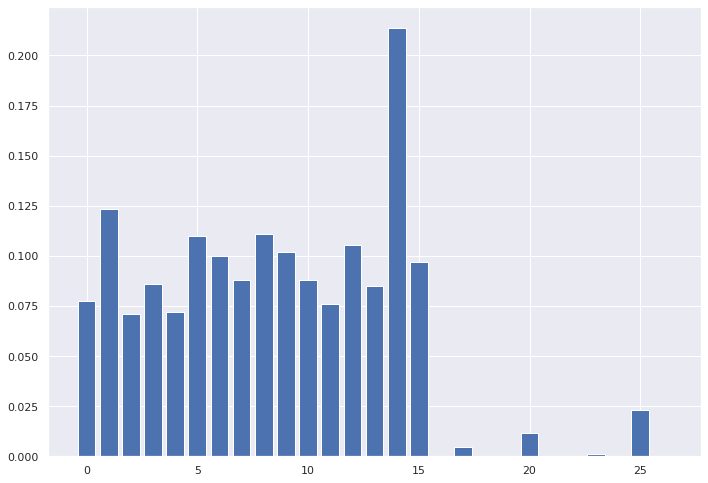

In [42]:
#call the function select_features
X_treino_fs, fs = select_features(X_treino, y_treino)

# what are scores for the features (list the score of each feature)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [43]:
#get the 15 most important variable
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes ]


In [44]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [45]:
#removing the outliers using quantile measure
dados = dfTrain.copy()
#for c in n_preditoras:
#  Q1 = dados[c].quantile(0.25)
#  Q3 = dados[c].quantile(0.75)
#  IQR = Q3 - Q1
#  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [46]:
#pearson and spearman correlation
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V21,V20,V3,V13,V16,V6,V10,V18,V9,V12,V15,V8,V11,V4,V17
V21,1.000000,0.016641,-0.007524,-0.003270,-0.019640,-0.000387,-0.003268,-0.025934,-0.006037,-0.011217,0.013264,-0.003704,-0.004042,-0.017084,-0.025544
V20,0.016641,1.000000,0.021759,0.033545,0.031224,0.021586,0.033543,0.016482,0.039578,0.048379,-0.037345,0.038662,0.041013,0.014409,-0.008854
V3,-0.007524,0.021759,1.000000,0.641014,0.411791,0.967857,0.641016,0.717456,0.694096,0.627016,-0.659002,0.687538,0.669591,0.858551,0.227024
V13,-0.003270,0.033545,0.641014,1.000000,0.441952,0.656800,1.000000,0.573661,0.968304,0.883415,-0.780644,0.979972,0.965612,0.612197,0.126530
V16,-0.019640,0.031224,0.411791,0.441952,1.000000,0.370937,0.441959,0.559053,0.474855,0.483116,-0.657909,0.472064,0.455925,0.547103,0.184049
V6,-0.000387,0.021586,0.967857,0.656800,0.370937,1.000000,0.656803,0.665270,0.713624,0.651312,-0.650665,0.712702,0.709534,0.788864,0.180539
V10,-0.003268,0.033543,0.641016,1.000000,0.441959,0.656803,1.000000,0.573664,0.968306,0.883416,-0.780645,0.979974,0.965613,0.612200,0.126529
V18,-0.025934,0.016482,0.717456,0.573661,0.559053,0.665270,0.573664,1.000000,0.631686,0.618943,-0.750613,0.612283,0.591211,0.790928,0.387267
V9,-0.006037,0.039578,0.694096,0.968304,0.474855,0.713624,0.968306,0.631686,1.000000,0.934977,-0.800786,0.992303,0.977410,0.646049,0.121575
V12,-0.011217,0.048379,0.627016,0.883415,0.483116,0.651312,0.883416,0.618943,0.934977,1.000000,-0.773861,0.933744,0.937911,0.577094,0.175666


,V21,V20,V3,V13,V16,V6,V10,V18,V9,V12,V15,V8,V11,V4,V17
V21,1.000000,0.019662,-0.011147,-0.014269,-0.014348,-0.009368,-0.014257,-0.019552,-0.013022,-0.014922,0.010573,-0.014074,-0.014957,-0.011374,-0.026232
V20,0.019662,1.000000,0.015259,0.049567,0.035644,0.013382,0.049567,0.022089,0.049055,0.051952,-0.042945,0.050391,0.051576,0.022611,-0.005964
V3,-0.011147,0.015259,1.000000,0.607746,0.519700,0.955943,0.607745,0.841318,0.663052,0.623547,-0.745171,0.641892,0.612350,0.899536,0.436419
V13,-0.014269,0.049567,0.607746,1.000000,0.431457,0.652189,1.000000,0.586486,0.964802,0.917000,-0.779047,0.983646,0.982150,0.579338,0.248633
V16,-0.014348,0.035644,0.519700,0.431457,1.000000,0.503719,0.431467,0.541264,0.470552,0.504522,-0.644821,0.479786,0.458281,0.629945,0.181063
V6,-0.009368,0.013382,0.955943,0.652189,0.503719,1.000000,0.652188,0.841950,0.691103,0.659397,-0.783978,0.678967,0.660515,0.883948,0.478518
V10,-0.014257,0.049567,0.607745,1.000000,0.431467,0.652188,1.000000,0.586490,0.964803,0.916999,-0.779045,0.983647,0.982149,0.579342,0.248644
V18,-0.019552,0.022089,0.841318,0.586486,0.541264,0.841950,0.586490,1.000000,0.652999,0.656096,-0.744737,0.635535,0.616122,0.798884,0.408790
V9,-0.013022,0.049055,0.663052,0.964802,0.470552,0.691103,0.964803,0.652999,1.000000,0.950717,-0.782699,0.986543,0.973268,0.630840,0.253086
V12,-0.014922,0.051952,0.623547,0.917000,0.504522,0.659397,0.916999,0.656096,0.950717,1.000000,-0.786602,0.963311,0.960027,0.629502,0.295967


In [47]:
#removing variables with high correlation (greater than 0.9)
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)
n_preditoras = [c for c in n_preditoras if not c in retirar]
n_preditoras

['V21',
 'V20',
 'V16',
 'V6',
 'V10',
 'V18',
 'V9',
 'V15',
 'V8',
 'V11',
 'V4',
 'V17']

In [48]:
#removing variables with high correlation (greater than 0.9)
dados_corr = dados[n_preditoras].corr('spearman')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)
n_preditoras = [c for c in n_preditoras if not c in retirar]
n_preditoras

['V21', 'V20', 'V16', 'V6', 'V18', 'V9', 'V15', 'V8', 'V11', 'V4', 'V17']

In [49]:
k=2
dados['bias'] = dados[n_preditoras].loc[:,:].apply(lambda x: k*x[n_preditoras[0]] +
                                                             (k+1)*x[n_preditoras[1]] +
                                                             (k+2)*x[n_preditoras[2]] +
                                                             (k+3)*x[n_preditoras[3]] +
                                                             (k+4)*x[n_preditoras[4]] +
                                                             (k+5)*x[n_preditoras[5]] +
                                                             (k+6)*x[n_preditoras[6]] +
                                                             (k+7)*x[n_preditoras[7]] +
                                                             (k+8)*x[n_preditoras[8]] +
                                                             (k+9)*x[n_preditoras[9]] +
                                                             (k+10)*x[n_preditoras[10]], axis=1)
n_preditoras.append('bias')

In [50]:
dados[n_preditoras].head(10)

,V21,V20,V16,V6,V18,V9,V15,V8,V11,V4,V17,bias
0,-1.217875,-0.824511,0.46124,0.00124,0.12722,0.105,28.897,0.01147,0.00658,0.000018,0.58305,236.782020
1,-0.812559,0.080466,0.55084,0.00128,0.12869,0.137,26.027,0.01575,0.00868,0.000021,0.57033,217.845924
2,-0.027766,-0.060555,0.59287,0.00213,0.26151,0.242,23.010,0.02644,0.01423,0.000028,0.60478,197.125916
3,-1.298289,-0.153332,0.53716,0.00399,0.19362,0.261,21.479,0.02975,0.01610,0.000043,0.75339,183.402637
4,-0.469064,-0.985639,0.46322,0.00251,0.19423,0.448,23.136,0.04983,0.02876,0.000026,0.57274,194.968998
5,0.936753,-0.295073,0.50143,0.00125,0.12266,0.283,22.684,0.03180,0.01679,0.000011,0.58618,194.677596
6,0.083820,-0.409912,0.41777,0.00125,0.20050,0.133,24.617,0.01523,0.00906,0.000014,0.58788,206.967614
7,0.823381,-0.480716,0.65796,0.00268,0.15965,0.498,18.074,0.06048,0.03809,0.000036,0.59287,159.925813
8,-1.217263,-0.459089,0.50262,0.00303,0.21970,0.237,21.885,0.02724,0.01738,0.000038,0.63071,184.258930
9,-1.241418,-1.518987,0.72560,0.00339,0.29336,0.280,17.963,0.03383,0.02062,0.000057,0.70134,152.231087


In [51]:
#split train sample in two samples: X_treino and X_teste
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [ ]:
#simulating the best number of estimator for random forest
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n, random_state= 12)
    model.fit(X_treino,y_treino)
    y_pred = model.predict(X_teste) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

Number of Estimators: 1 mse: 0.24618563587752504 rmse: 0.49617097444079195
Number of Estimators: 11 mse: 0.12914175012211246 rmse: 0.3593629782296897
Number of Estimators: 21 mse: 0.12079889978284865 rmse: 0.34756136117648156


In [ ]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelRf = RandomForestRegressor(n_estimators=best_n, random_state=12)
modelRf.fit(X_treino,y_treino)
y_pred = modelRf.predict(X_teste) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 


In [ ]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [ ]:
#simulating the best number of estimator for ExtraTreesRegressor
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = ExtraTreesRegressor(n_estimators=n, random_state= 123)
    model.fit(X_treino,y_treino)
    y_pred = model.predict(X_teste) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

In [ ]:
#training the model for the best_n value for estimator. Also getting mse, mae and rmse
modelETR = ExtraTreesRegressor(n_estimators=best_n, random_state=123, n_jobs = -1)
modelETR.fit(X_treino,y_treino)
y_pred = modelETR.predict(X_teste) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
rmse =  mean_squared_error(y_pred, y_teste, squared=False)
rmse, mse, mae 

In [ ]:
plt.plot(X_teste,y_teste, 'ro', label='Dados originais')
plt.plot(X_teste,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [ ]:
#train a new model with all examples of training file
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+0.01))
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(X)
X_ = transformer.transform(X)
modelEnd= ExtraTreesRegressor(n_estimators=best_n, random_state=123, n_jobs = -1)
modelEnd.fit(X_,y)

In [ ]:
##transform test sample and predict with the best model
#the best model is modelETR because it got the lowest RMSE.
dfTest = pd.read_csv('test.csv')
X_teste = dfTest[n_preditoras]
x_teste = transformer.transform(X_teste)
y_pred = modelEnd.predict(x_teste) 

In [ ]:
#create a new dataframe with predicted values. Then, export it to a csv.
dfRes = pd.DataFrame()
dfRes['Id'] = dfTest['Id']
dfRes['Expected'] = np.exp(y_pred-0.01)
dfRes.to_csv('hed_result.csv', index=False)

In [ ]:
#list the first lines of file.
!head hed_result.csv 